# 03 - Predictability & Universe Filtering

1. Compute rolling predictability metrics for each ticker
2. Visualize and compare scores across universe and time
3. Select top-N most “learnable” tickers for RL agent
4. Document all decisions, assumptions, and open questions


In [1]:
# SETUP: Imports & Paths ===========================
import jupyter

import os
import pandas as pd


from tqdm import tqdm
from src.data.feature_pipeline import basic_chart_features,load_base_dataframe
from src.predictability.easiness import rolling_sharpe, rolling_r2, rolling_info_ratio, rolling_autocorr
from src.predictability.pipeline import generate_universe_easiness_report
from IPython import display


C:\Users\Francisco Sá\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# LOAD OHLCV ==========================================
ohlcv_df = load_base_dataframe()
ohlcv_df.tail()
_ohlcv=ohlcv_df.copy()

In [3]:
# CROP THE SAMPLE =======================================
tickers = ohlcv_df['symbol'].unique()

In [ ]:
#['2023-07-01', '2024-01-01', '2024-07-01', '2025-01-01'],

[CACHE] Loading existing study from data/experiments/predictability_metrics-8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b216b96d6df748ed8e49e-2023-07-01-2024-01-01.csv


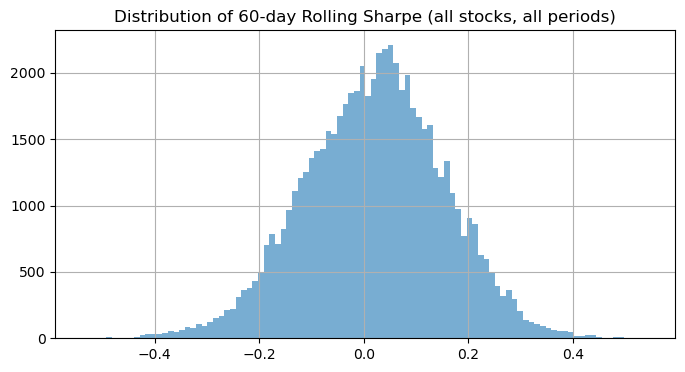

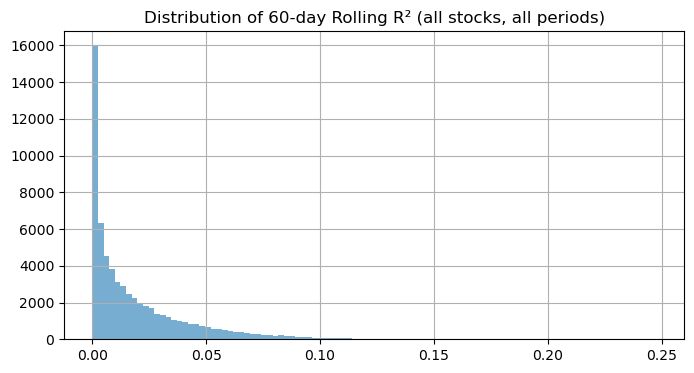

Top tickers by 60-day Sharpe in last period:


,ticker,sharpe,r2
43469,NRG,0.432444,0.005030
1133,AFL,0.398348,0.017087
8567,BA,0.397594,0.033548
53171,STT,0.379233,0.010647
31499,ICE,0.366325,0.049425
33515,JPM,0.364516,0.039283
12725,CMG,0.361549,0.003911
27971,HIG,0.359207,0.000818
41075,MCO,0.358648,0.000054
377,ABT,0.356326,0.021051


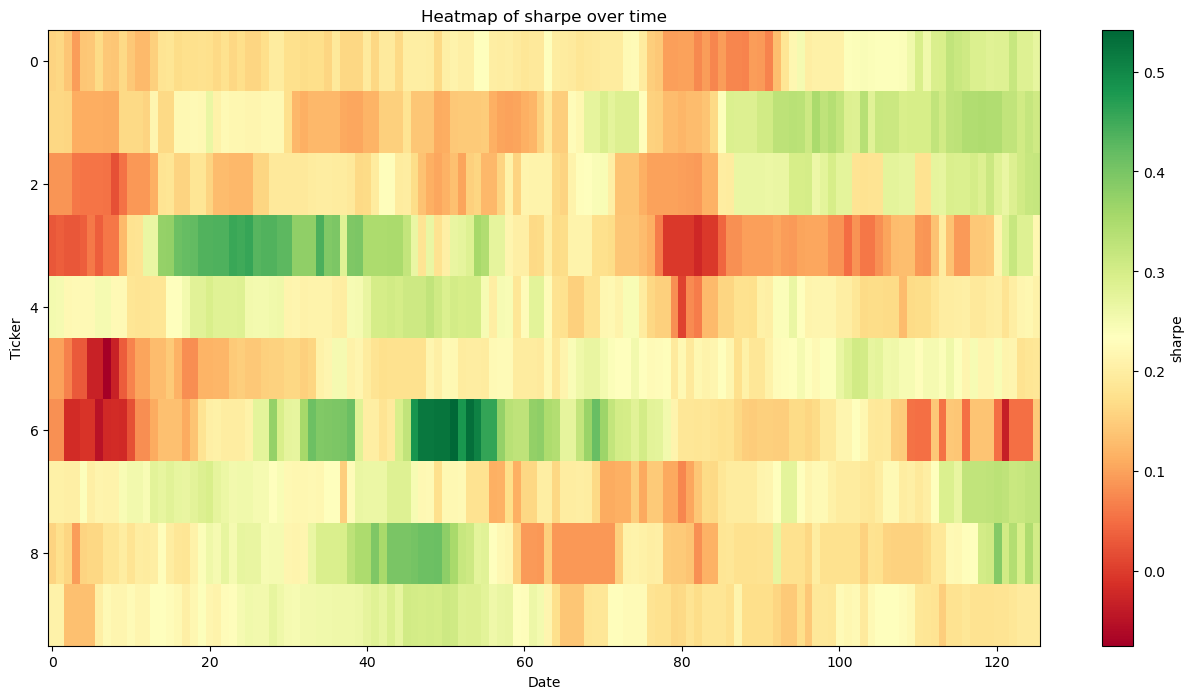

Sample of top 5 per date:


C:\Users\Francisco Sá\Dev\RL-Stock-Market-Masterpiece-Human-x-AI-Collab\src\predictability\pipeline.py:182: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('sharpe', ascending=False).head(5))


,ticker,date,return_1d,sharpe,r2,info_ratio,autocorr,sortino,calmar,hurst,aprox_entropy,variance_ratio,volatility_regimes,avg_dollar_volume,spread_proxy,config_hash,config_json
0,DELL,2023-07-03,0.009240,0.451684,0.004532,0.266965,0.025019,0.784326,0.105628,0.664499,0.410793,1.036754,0,1.865193e+08,1.03000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
1,RCL,2023-07-03,-0.005205,0.392548,0.016219,0.478729,0.243261,1.001765,0.112461,0.558421,0.308572,1.230852,0,2.769379e+08,2.11500,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
2,TSLA,2023-07-03,0.068954,0.385294,0.068499,0.310828,0.081605,0.659941,0.065692,0.637893,0.498843,1.079552,0,2.581998e+10,7.29745,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
3,MLM,2023-07-03,-0.011848,0.376324,0.006196,0.271456,0.006325,0.985560,0.135594,0.542945,0.419966,0.959082,0,1.253704e+08,6.90000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
4,DAL,2023-07-03,0.008835,0.351031,0.076138,0.371368,0.124381,0.771139,0.075740,0.564656,0.355868,1.122036,0,3.485224e+08,0.87545,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."


[CACHE] Loading existing study from data/experiments/predictability_metrics-9c37f7afd47764eca915b29ca060ad8126a41bbca74bbc62bf6ecd6a0d1f178e-2024-01-01-2024-07-01.csv


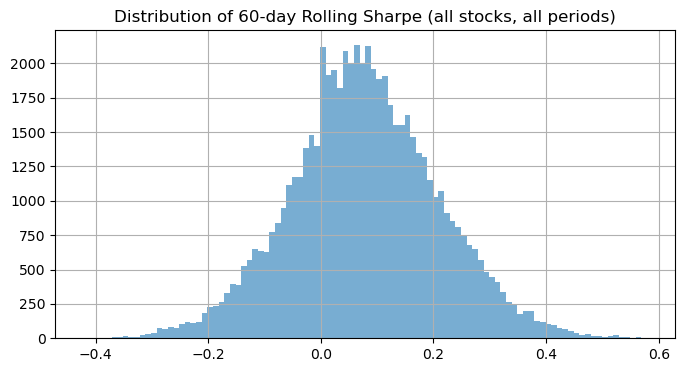

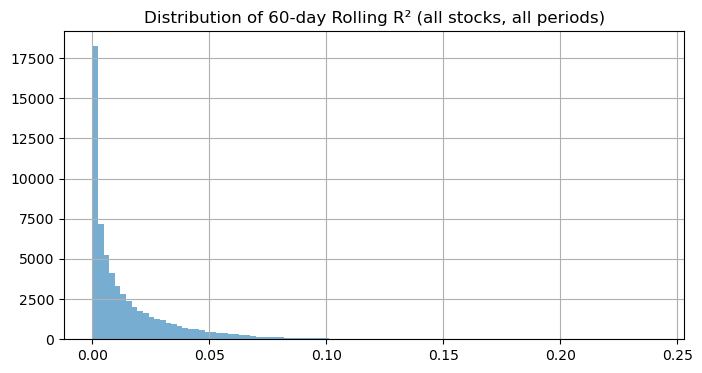

Top tickers by 60-day Sharpe in last period:


,ticker,sharpe,r2
16124,COST,0.361718,0.002640
49436,REGN,0.351982,0.032021
59374,VST,0.336223,0.006247
45186,PANW,0.332545,0.000952
47936,PEG,0.321508,0.007131
6624,AVB,0.317413,0.000326
60999,WELL,0.313458,0.001237
2624,GOOG,0.305236,0.000519
25374,FOX,0.295794,0.000249
44436,OKE,0.293382,0.004532


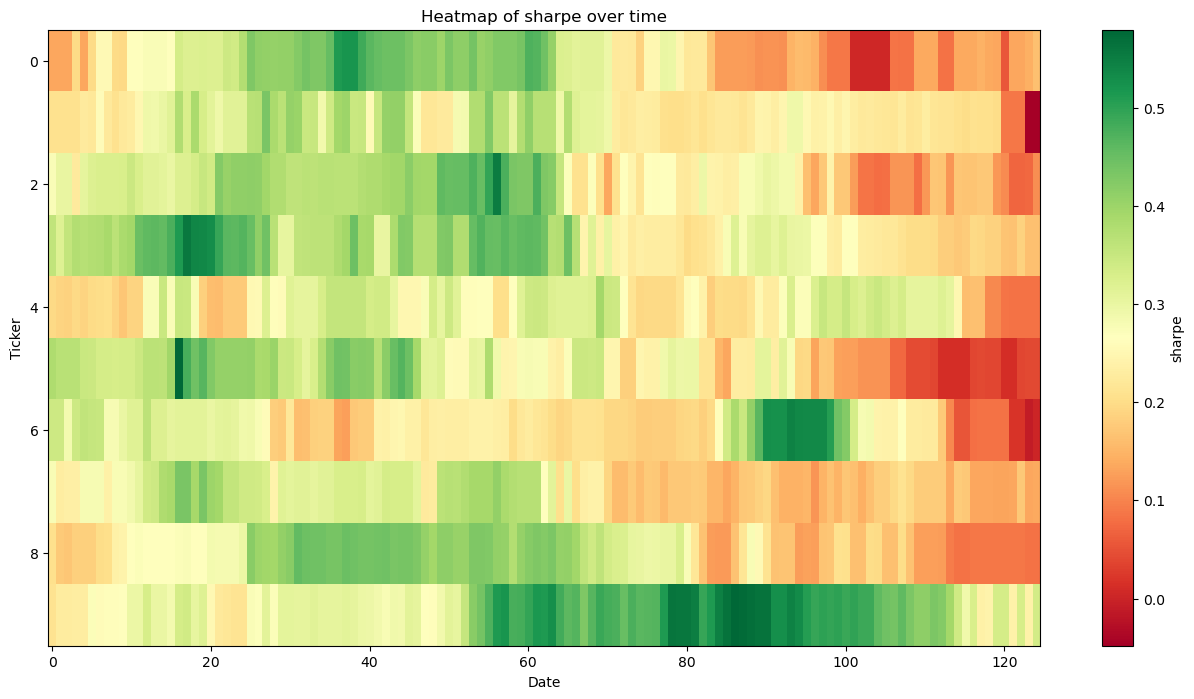

Sample of top 5 per date:


C:\Users\Francisco Sá\Dev\RL-Stock-Market-Masterpiece-Human-x-AI-Collab\src\predictability\pipeline.py:182: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('sharpe', ascending=False).head(5))


,ticker,date,return_1d,sharpe,r2,info_ratio,autocorr,sortino,calmar,hurst,aprox_entropy,variance_ratio,volatility_regimes,avg_dollar_volume,spread_proxy,config_hash,config_json
0,TMUS,2024-01-02,0.009855,0.422532,0.000757,0.039123,0.231946,0.744638,0.084427,0.604777,0.421902,1.240303,0,5.963469e+08,2.05000,9c37f7afd47764eca915b29ca060ad8126a41bbca74bbc...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
1,AFL,2024-01-02,0.009455,0.396828,0.010625,0.115568,0.240277,0.641225,0.071060,0.718493,0.481227,1.259132,0,1.725474e+08,1.11400,9c37f7afd47764eca915b29ca060ad8126a41bbca74bbc...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
2,STT,2024-01-02,0.003744,0.379805,0.003030,0.212456,0.051829,0.701013,0.066685,0.574886,0.325904,1.057769,0,1.204139e+08,1.21000,9c37f7afd47764eca915b29ca060ad8126a41bbca74bbc...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
3,JPM,2024-01-02,0.011640,0.378985,0.036045,0.177033,0.022697,0.621615,0.042631,0.627883,0.355463,1.034561,0,1.327771e+09,1.86000,9c37f7afd47764eca915b29ca060ad8126a41bbca74bbc...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
4,BA,2024-01-02,-0.034144,0.376722,0.020484,0.214830,0.220014,0.732087,0.063613,0.607708,0.338057,1.236641,0,1.138892e+09,4.27915,9c37f7afd47764eca915b29ca060ad8126a41bbca74bbc...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."


[CACHE] Loading existing study from data/experiments/predictability_metrics-ba3269ab135146d1f20ee0055b3e350214a1d529d9f0031f0658f118bc91c6f5-2024-07-01-2025-01-01.csv


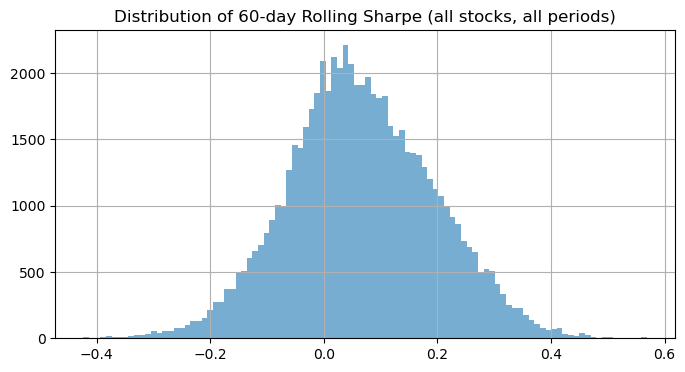

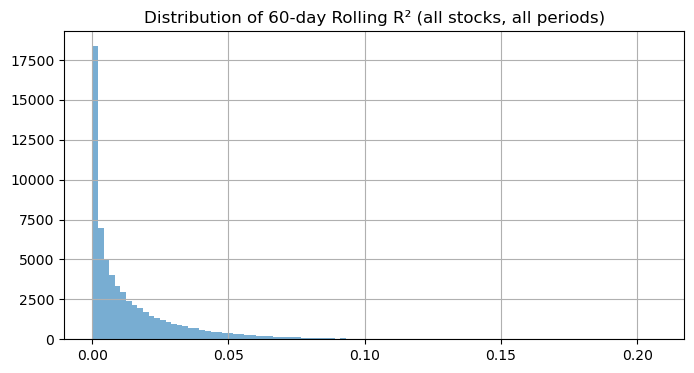

Top tickers by 60-day Sharpe in last period:


,ticker,sharpe,r2
42495,NDAQ,0.374456,0.026692
61695,WMT,0.269092,0.006937
6015,AIZ,0.256375,0.004761
64127,ZBRA,0.248905,0.022013
19455,DASH,0.241949,0.038022
28159,GDDY,0.235546,0.022527
59007,UAL,0.232294,0.074927
55551,TTWO,0.227299,0.041982
27775,GILD,0.218605,0.008648
5119,AAPL,0.215785,0.004952


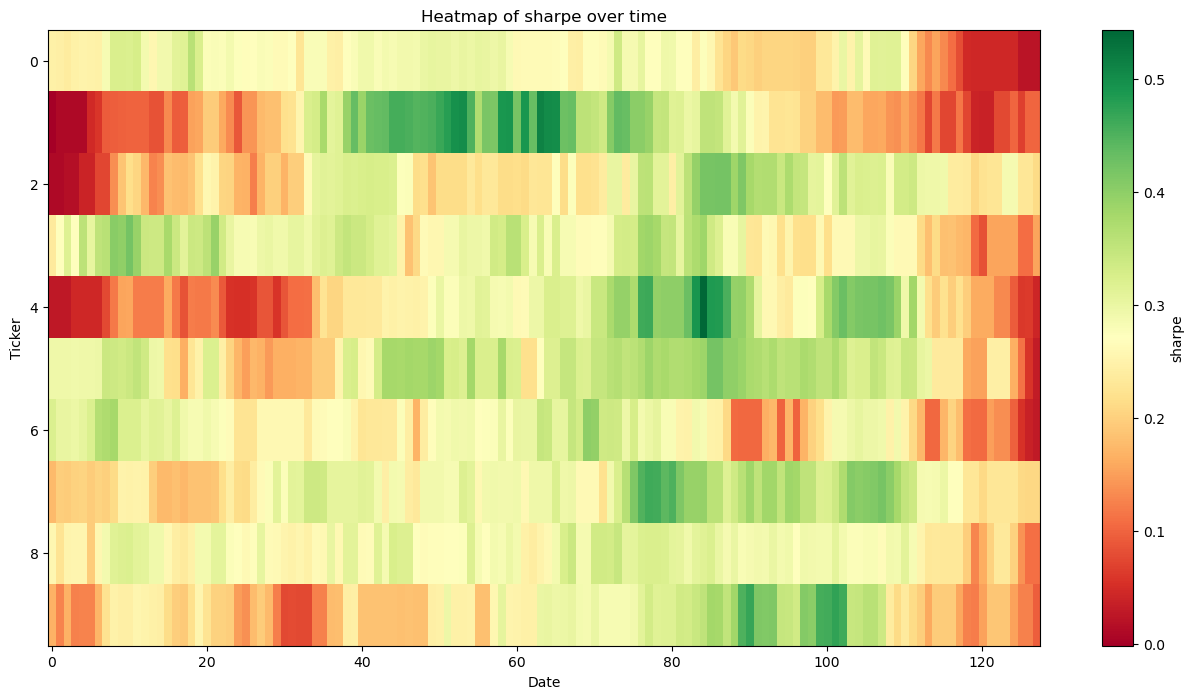

Sample of top 5 per date:


C:\Users\Francisco Sá\Dev\RL-Stock-Market-Masterpiece-Human-x-AI-Collab\src\predictability\pipeline.py:182: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('sharpe', ascending=False).head(5))


,ticker,date,return_1d,sharpe,r2,info_ratio,autocorr,sortino,calmar,hurst,aprox_entropy,variance_ratio,volatility_regimes,avg_dollar_volume,spread_proxy,config_hash,config_json
0,COST,2024-07-01,-0.005082,0.361718,0.002640,0.263058,0.096907,0.775220,0.104790,0.537806,0.397086,1.111510,0,1.310517e+09,11.17000,ba3269ab135146d1f20ee0055b3e350214a1d529d9f003...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
1,REGN,2024-07-01,0.005699,0.351982,0.032021,0.281196,0.257402,0.697061,0.056478,0.599264,0.392401,1.251763,0,3.986945e+08,15.48000,ba3269ab135146d1f20ee0055b3e350214a1d529d9f003...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
2,VST,2024-07-01,0.015818,0.336223,0.006247,0.248776,-0.013815,0.626590,0.056231,0.659232,0.378583,0.985693,1,5.764801e+08,4.28500,ba3269ab135146d1f20ee0055b3e350214a1d529d9f003...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
3,PANW,2024-07-01,0.005575,0.332545,0.000952,0.178736,-0.067146,0.608156,0.061463,0.582982,0.275324,0.937995,0,9.488247e+08,7.90665,ba3269ab135146d1f20ee0055b3e350214a1d529d9f003...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
4,PEG,2024-07-01,-0.000950,0.321508,0.007131,0.003074,-0.107741,0.609642,0.075181,0.593888,0.339649,0.897508,0,1.772948e+08,1.03250,ba3269ab135146d1f20ee0055b3e350214a1d529d9f003...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."


In [62]:
#all_metric.dropna()
start = '2023-07-01'
end = '2024-01-01'
period_a = generate_universe_easiness_report(
    ohlcv_df,
    tickers,
     cutoff_start_date=start,
        cutoff_end_date=end,
    save_csv_path="data/experiments/predictability_metrics-{hash}-{start}-{cutoff}.csv".format(hash="{hash}", cutoff=end,start=start))
start = '2024-01-01'
end = '2024-07-01'
period_b = generate_universe_easiness_report(
    ohlcv_df,
    tickers,
     cutoff_start_date=start,
        cutoff_end_date=end,
    save_csv_path="data/experiments/predictability_metrics-{hash}-{start}-{cutoff}.csv".format(hash="{hash}", cutoff=end,start=start))
start = '2024-07-01'
end = '2025-01-01'
period_c = generate_universe_easiness_report(
    ohlcv_df,
    tickers,
     cutoff_start_date=start,
        cutoff_end_date=end,
    save_csv_path="data/experiments/predictability_metrics-{hash}-{start}-{cutoff}.csv".format(hash="{hash}", cutoff=end,start=start))

In [118]:
period_a

,ticker,date,return_1d,sharpe,r2,info_ratio,autocorr,sortino,calmar,hurst,aprox_entropy,variance_ratio,volatility_regimes,avg_dollar_volume,spread_proxy,config_hash,config_json
0,MMM,2023-07-03,0.010491,-0.096890,0.000058,-0.129698,-0.193867,-0.185593,-0.014289,0.496377,0.446764,0.818217,1,3.142806e+08,1.96370,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
1,MMM,2023-07-05,-0.024817,-0.095590,0.000095,-0.128114,-0.188399,-0.180203,-0.014289,0.493079,0.447169,0.822046,1,3.161516e+08,2.00000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
2,MMM,2023-07-06,-0.023522,-0.110222,0.001535,-0.164249,-0.194478,-0.205560,-0.016621,0.496989,0.423672,0.804346,1,3.221295e+08,2.00000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
3,MMM,2023-07-07,0.010175,-0.110787,0.003013,-0.165106,-0.175433,-0.205560,-0.016621,0.498239,0.400176,0.821550,1,3.290230e+08,2.02000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
4,MMM,2023-07-10,-0.001028,-0.110016,0.000092,-0.186765,-0.185703,-0.203982,-0.016505,0.497946,0.430545,0.825587,1,3.343791e+08,2.02000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63183,SPY,2023-12-22,0.002010,0.263171,0.013954,0.058514,0.118444,0.488923,0.035113,0.583628,0.355565,1.125359,0,3.498300e+10,4.16995,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
63184,SPY,2023-12-26,0.004223,0.282157,0.018097,0.049618,0.123353,0.522103,0.037587,0.588986,0.331663,1.139649,0,3.475885e+10,4.13750,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
63185,SPY,2023-12-27,0.001808,0.282351,0.016475,0.058637,0.121273,0.521702,0.037587,0.589153,0.314634,1.138563,0,3.445152e+10,4.12750,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
63186,SPY,2023-12-28,0.000378,0.291931,0.014417,0.049751,0.115593,0.554745,0.037587,0.597302,0.364315,1.097358,0,3.445152e+10,4.10000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."


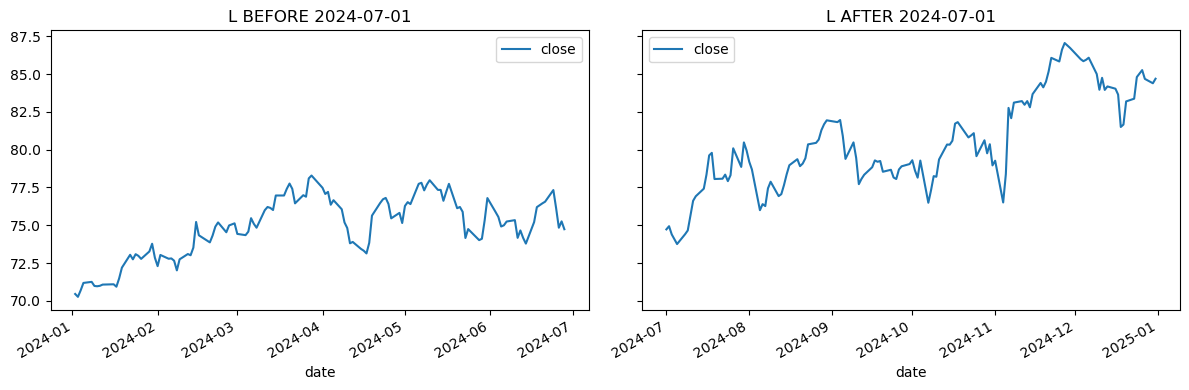

In [44]:
import matplotlib.pyplot as plt
#'2023-07-01', '2024-01-01', '2024-07-01', '2025-01-01'
def plot_ticker_before_and_after(ticker, start="2024-01-01", end="2024-07-01", after='2025-01-01'):
    _df = ohlcv_df[ohlcv_df['symbol'] == ticker].copy()

    # Before split_date
    df_before = _df[_df['date'] >=start]
    df_before = df_before[df_before['date'] < end]
    # After split_date (up to end)
    df_after = _df[(_df['date'] >= end) & (_df['date'] <= after)]

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    df_before.plot(x='date', y='close', ax=axes[0], title=f"{ticker} BEFORE {end}")
    df_after.plot(x='date', y='close', ax=axes[1], title=f"{ticker} AFTER {end}")
    plt.tight_layout()
    plt.show()

plot_ticker_before_and_after('L')

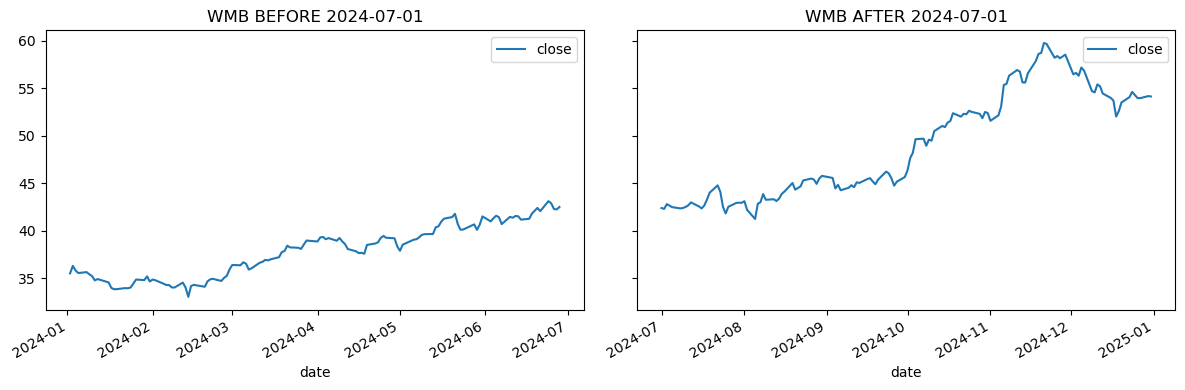

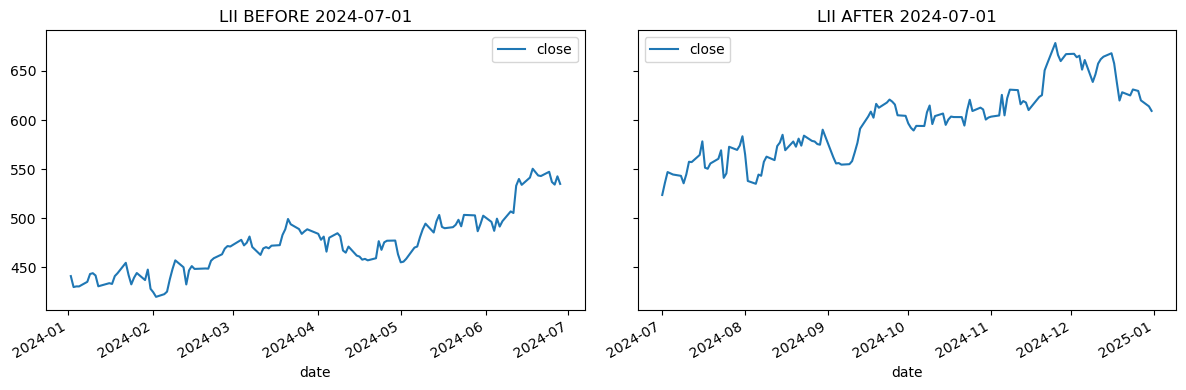

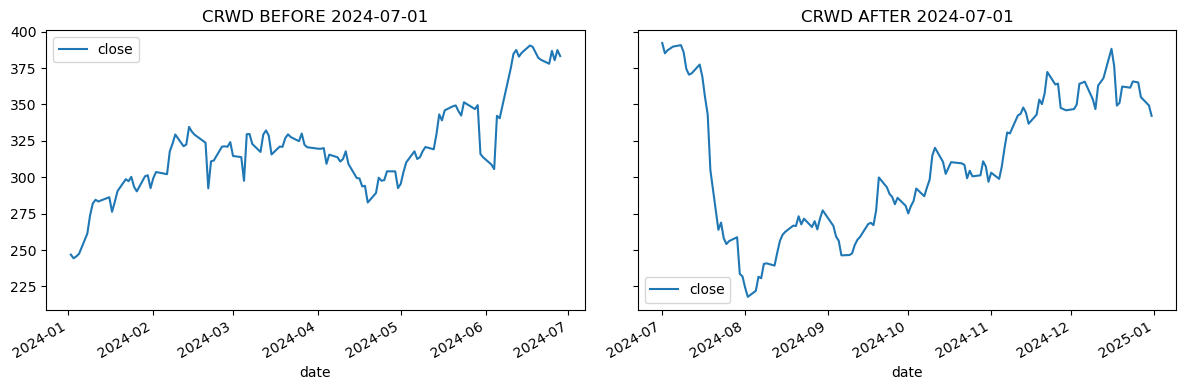

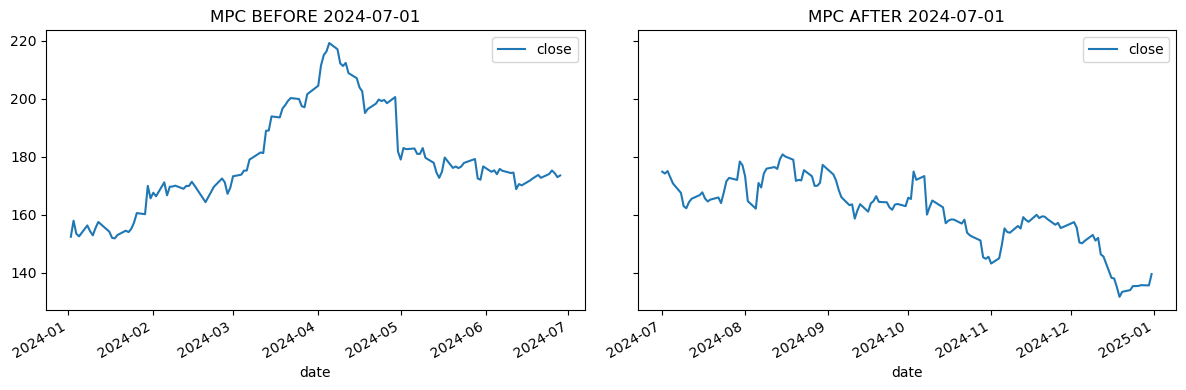

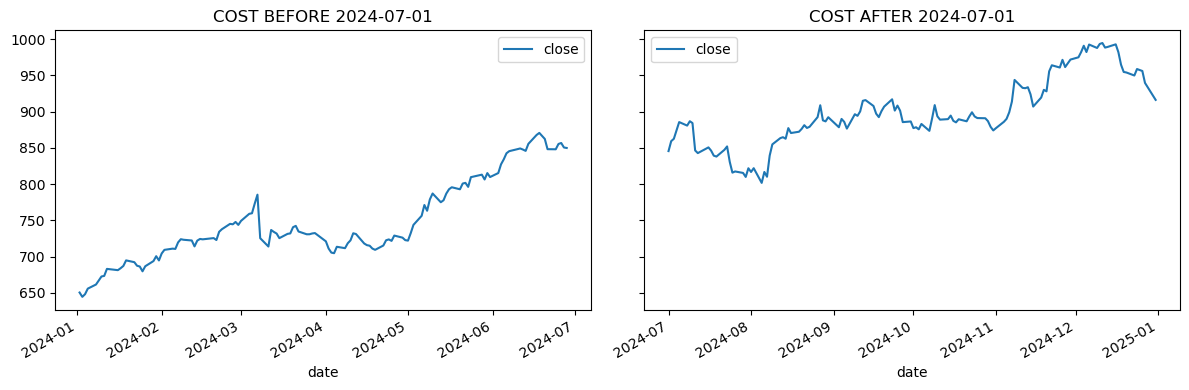

In [45]:
def get_most_stable_stocks(all_metric, top_n=10):
    """
    Calculate a stability score for each ticker using available columns.
    Higher score = more stable (higher Sharpe/Sortino/Calmar, lower volatility/entropy).
    Returns DataFrame with top_n most stable stocks.
    """
    # Only use needed columns to save memory/time
    cols = [
        'ticker', 'sharpe', 'sortino', 'calmar',
        'return_1d', 'aprox_entropy', 'volatility_regimes'
    ]
    df = all_metric[cols].copy()

    # Aggregate: mean and std for each relevant column by ticker
    aggs = {col: ['mean', 'std'] for col in ['sharpe', 'sortino', 'calmar', 'return_1d', 'aprox_entropy']}
    aggs['volatility_regimes'] = ['mean']

    summary = df.groupby('ticker').agg(aggs)
    summary.columns = ['_'.join(c) for c in summary.columns]
    summary = summary.reset_index()

    # Efficiently calculate stability score (vectorized)
    summary['stability_score'] = (
        -summary['sharpe_std']
        -summary['return_1d_std']
        -summary['aprox_entropy_mean']
        +summary['sharpe_mean']
        +summary['sortino_mean']
        +summary['calmar_mean']
    )

    # Sort and return top N
    return summary.sort_values('stability_score', ascending=False).head(top_n)[
        ['ticker', 'stability_score', 'sharpe_mean', 'sharpe_std', 'return_1d_std']
    ]

# Usage:
most_stable = get_most_stable_stocks(all_metric, top_n=10)
most_stable
for i in range(5):
    plot_ticker_before_and_after(most_stable.iloc[i]['ticker'])

C:\Users\Francisco Sá\AppData\Local\Temp\ipykernel_8916\3358563214.py:37: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('ticker').apply(weighted_stats).reset_index()


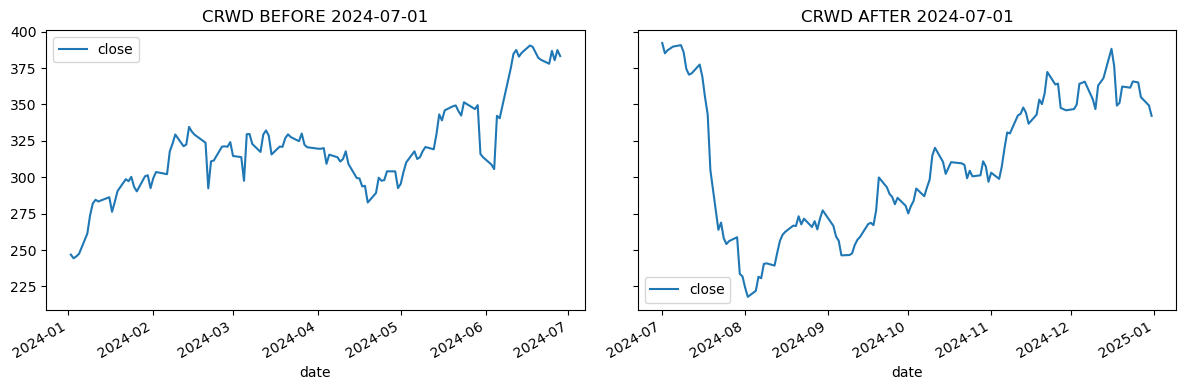

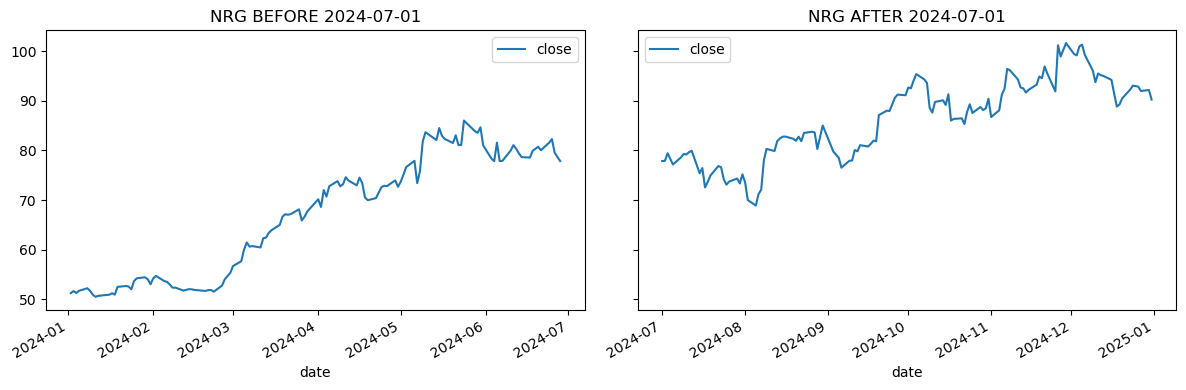

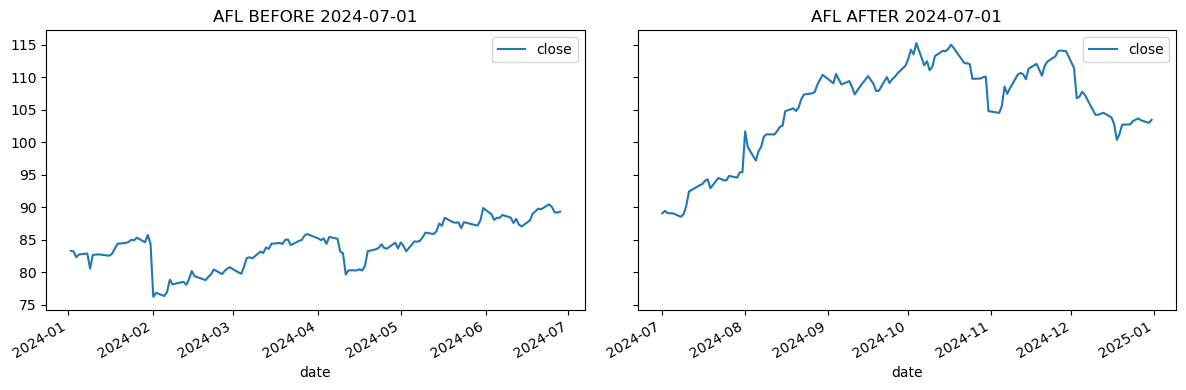

C:\Users\Francisco Sá\AppData\Local\Temp\ipykernel_8916\3358563214.py:37: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('ticker').apply(weighted_stats).reset_index()


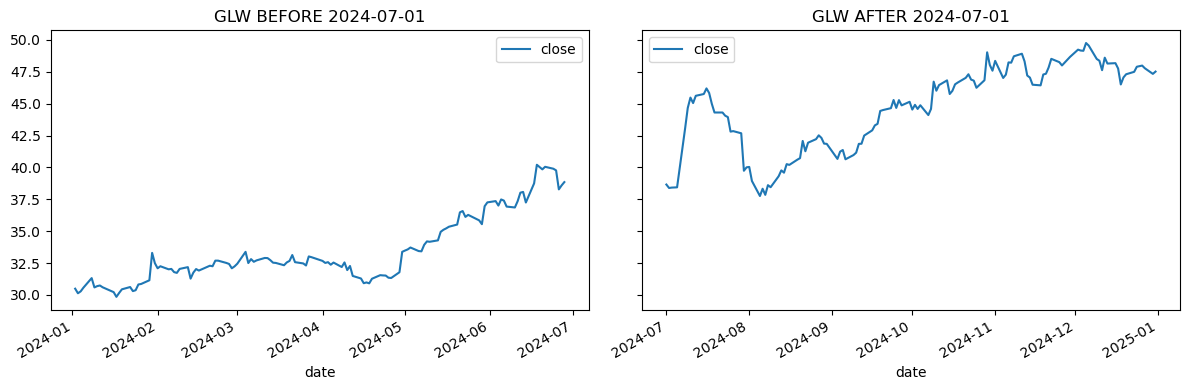

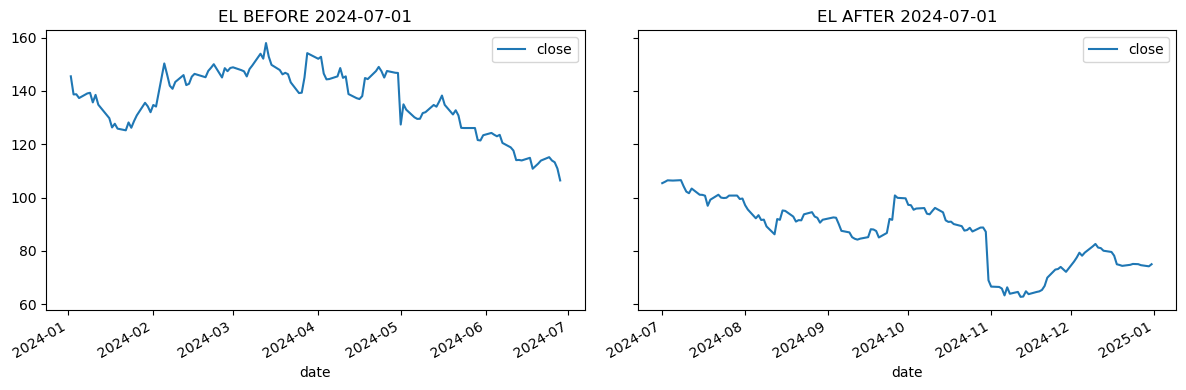

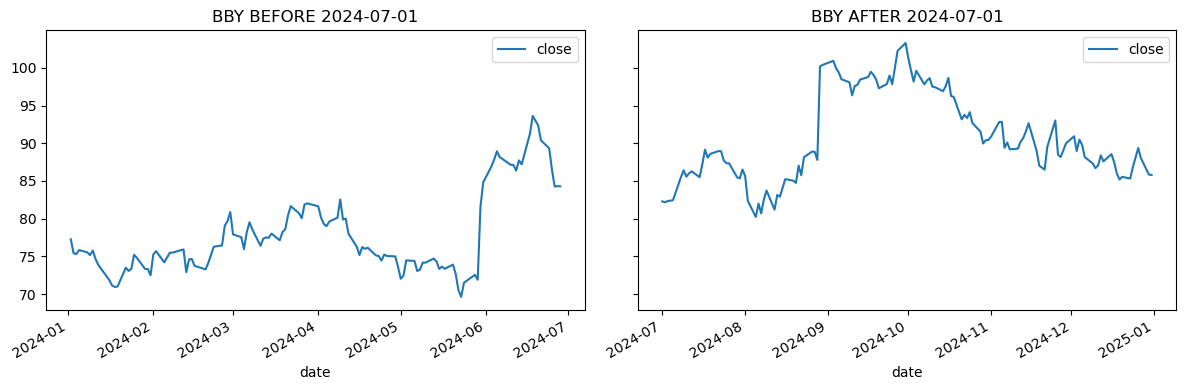

In [57]:
import numpy as np
import pandas as pd

def get_most_stable_stocks_weighted(all_metric, top_n=10, decay=0.97, date_col='date',ascending=False):
    """
    Calculate a recency-weighted stability score for each ticker.
    - Higher score: more stable (high Sharpe/Sortino/Calmar, low volatility/entropy)
    - More recent data counts more (exponential decay)
    """
    # Needed columns
    cols = [
        'ticker', date_col, 'sharpe', 'sortino', 'calmar', 'return_1d', 'aprox_entropy'
    ]
    df = all_metric[cols].copy()
    df[date_col] = pd.to_datetime(df[date_col])

    # For each ticker, compute recency weights and weighted stats
    def weighted_stats(group):
        group = group.sort_values(date_col)
        n = len(group)
        weights = decay ** np.arange(n-1, -1, -1)
        weights = weights / weights.sum()  # Normalize

        # Vectorized weighted mean/std
        wm = lambda x: np.sum(x * weights)
        wstd = lambda x: np.sqrt(np.sum(weights * (x - wm(x))**2))
        stats = {
            'sharpe_mean': wm(group['sharpe']),
            'sharpe_std': wstd(group['sharpe']),
            'sortino_mean': wm(group['sortino']),
            'calmar_mean': wm(group['calmar']),
            'return_1d_std': wstd(group['return_1d']),
            'aprox_entropy_mean': wm(group['aprox_entropy']),
        }
        return pd.Series(stats)

    summary = df.groupby('ticker').apply(weighted_stats).reset_index()

    # Calculate stability score
    summary['stability_score'] = (
        -summary['sharpe_std']
        -summary['return_1d_std']
        -summary['aprox_entropy_mean']
        +summary['sharpe_mean']
        +summary['sortino_mean']
        +summary['calmar_mean']
    )

    # Top N most stable, recent-weighted
    
    return summary.sort_values('stability_score', ascending=ascending).head(top_n)[
        ['ticker', 'stability_score', 'sharpe_mean', 'sharpe_std', 'return_1d_std']
    ]

# Usage:
most_stable_weighted = get_most_stable_stocks_weighted(all_metric, top_n=10, decay=0.97)
most_stable_weighted

for i in range(3):
    plot_ticker_before_and_after(most_stable_weighted.iloc[i]['ticker'])
    
least_stable_weighted = get_most_stable_stocks_weighted(all_metric, top_n=10, decay=0.97, ascending=True)
least_stable_weighted

for i in range(3):
    plot_ticker_before_and_after(least_stable_weighted.iloc[i]['ticker'])

In [145]:
pd.concat([period_a,period_b,period_c])

,ticker,date,return_1d,sharpe,r2,info_ratio,autocorr,sortino,calmar,hurst,aprox_entropy,variance_ratio,volatility_regimes,avg_dollar_volume,spread_proxy,config_hash,config_json
0,MMM,2023-07-03 00:00:00,0.010491,-0.096890,0.000058,-0.129698,-0.193867,-0.185593,-0.014289,0.496377,0.446764,0.818217,1,3.142806e+08,1.96370,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
1,MMM,2023-07-05 00:00:00,-0.024817,-0.095590,0.000095,-0.128114,-0.188399,-0.180203,-0.014289,0.493079,0.447169,0.822046,1,3.161516e+08,2.00000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
2,MMM,2023-07-06 00:00:00,-0.023522,-0.110222,0.001535,-0.164249,-0.194478,-0.205560,-0.016621,0.496989,0.423672,0.804346,1,3.221295e+08,2.00000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
3,MMM,2023-07-07 00:00:00,0.010175,-0.110787,0.003013,-0.165106,-0.175433,-0.205560,-0.016621,0.498239,0.400176,0.821550,1,3.290230e+08,2.02000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
4,MMM,2023-07-10 00:00:00,-0.001028,-0.110016,0.000092,-0.186765,-0.185703,-0.203982,-0.016505,0.497946,0.430545,0.825587,1,3.343791e+08,2.02000,8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b21...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64507,SPY,2024-12-24,0.011115,0.164409,0.004343,0.043953,0.101886,0.248530,0.035993,0.482518,0.577799,1.114229,0,2.361332e+10,4.29125,ba3269ab135146d1f20ee0055b3e350214a1d529d9f003...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
64508,SPY,2024-12-26,0.000067,0.166647,0.000205,0.043825,0.126697,0.251707,0.035993,0.485821,0.569141,1.113234,0,2.361332e+10,4.29125,ba3269ab135146d1f20ee0055b3e350214a1d529d9f003...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
64509,SPY,2024-12-27,-0.010526,0.163652,0.002999,0.043544,0.122289,0.246727,0.035993,0.481391,0.568931,1.141130,0,2.426544e+10,4.29125,ba3269ab135146d1f20ee0055b3e350214a1d529d9f003...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."
64510,SPY,2024-12-30,-0.011412,0.160588,0.009542,0.042889,0.122673,0.240794,0.035993,0.493102,0.548314,1.120218,0,2.456940e+10,4.29500,ba3269ab135146d1f20ee0055b3e350214a1d529d9f003...,"{""benchmark_col"": ""market_return_1d"", ""cutoff_..."


In [71]:
summary_A = get_most_stable_stocks(period_a, top_n=504)
summary_B = get_most_stable_stocks(period_b, top_n=504)
summary_C = get_most_stable_stocks(period_c, top_n=504)
merged = pd.merge(
    summary_A[['ticker', 'stability_score']].rename(columns={'stability_score':'score_A'}),
    summary_B[['ticker', 'stability_score']].rename(columns={'stability_score':'score_B'}),
    on='ticker'
)
merged = pd.merge(
    merged[['ticker', 'score_A','score_B']],#.rename(columns={'stability_score':'score_A'}),
    summary_C[['ticker', 'stability_score']].rename(columns={'stability_score':'score_C'}),
    on='ticker'
)
merged

,ticker,score_A,score_B,score_C
0,WMB,0.289331,-0.029214,0.296092
1,LII,0.249038,0.155113,-0.080773
2,CRWD,0.191278,-0.228314,-0.350784
3,MPC,0.191139,-0.114324,-0.666694
4,COST,0.159886,0.046711,-0.085702
...,...,...,...,...
497,GLW,-1.061472,-0.242037,-0.135170
498,PODD,-1.082069,-0.467996,-0.410376
499,NEE,-1.156094,0.042928,-0.090985
500,CAG,-1.167392,-0.511982,-0.516254


In [72]:
corr = merged['score_A'].corr(merged['score_B'])
print(f"Correlation of stability score between A and B: {corr:.2f}")

Correlation of stability score between A and B: 0.28


In [73]:
corr = merged['score_B'].corr(merged['score_C'])
print(f"Correlation of stability score between A and B: {corr:.2f}")

Correlation of stability score between A and B: 0.34


In [87]:
a_score = merged.sort_values(by="score_A",ascending=False)#.iloc[-10:]
a_score['score_A'].corr(merged[merged['ticker'].isin(a_score['ticker'])]['score_B'])

0.28479707338365284

In [122]:
summary_A

,ticker,stability_score,sharpe_mean,sharpe_std,return_1d_std
487,WMB,0.289331,0.216646,0.044723,0.010631
279,LII,0.249038,0.216907,0.054595,0.017080
113,CRWD,0.191278,0.214419,0.083028,0.024389
316,MPC,0.191139,0.222360,0.141886,0.015640
106,COST,0.159886,0.188980,0.057755,0.011148
...,...,...,...,...,...
204,GLW,-1.061472,-0.149459,0.210843,0.012193
378,PODD,-1.082069,-0.186662,0.192715,0.030570
331,NEE,-1.156094,-0.209787,0.102213,0.020530
73,CAG,-1.167392,-0.252602,0.105130,0.012212


In [133]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel

def walkforward_universe_selection(
    all_metrics,
    window_length_days=126,
    top_n=10,
    selector_metric='sharpe',
    test_metric='return_1d',
    random_repeats=10,
    step_days=126,
    min_date=None,
    max_date=None,
    print_progress=True
):
    df = all_metrics.copy()
    df['date'] = pd.to_datetime(df['date'])
    if min_date is None: min_date = df['date'].min()
    if max_date is None: max_date = df['date'].max()
    
    results = []
    start = min_date
    print('x',min_date,max_date,window_length_days)
    while (start + pd.Timedelta(days=2*window_length_days)) <= max_date:
        print('y')
        train_start = start
        train_end = train_start + pd.Timedelta(days=window_length_days)
        test_start = train_end
        test_end = test_start + pd.Timedelta(days=window_length_days)
        
        # TRAIN and TEST splits
        train = df[(df['date'] >= train_start) & (df['date'] < train_end)]
        test  = df[(df['date'] >= test_start) & (df['date'] < test_end)]
        
        # Select top N tickers by selector metric
        selector = train.groupby('ticker')[selector_metric].mean().reset_index()
        selector = selector.dropna()
        top_tickers = selector.sort_values(selector_metric, ascending=False).head(top_n)['ticker'].tolist()
        
        # Realized test performance for these tickers
        test_perf = test[test['ticker'].isin(top_tickers)]
        realized_score = test_perf.groupby('ticker')[test_metric].mean().mean() if not test_perf.empty else np.nan
        
        # Baseline: Random universes
        all_possible = selector['ticker'].tolist()
        rand_scores = []
        for _ in range(random_repeats):
            rand_tickers = np.random.choice(all_possible, size=top_n, replace=False)
            rand_perf = test[test['ticker'].isin(rand_tickers)]
            rand_score = rand_perf.groupby('ticker')[test_metric].mean().mean() if not rand_perf.empty else np.nan
            rand_scores.append(rand_score)
        rand_score_mean = np.nanmean(rand_scores)
        rand_score_std  = np.nanstd(rand_scores)
        
        # Store
        results.append({
            'train_start': train_start,
            'test_start': test_start,
            'realized_score': realized_score,
            'rand_score_mean': rand_score_mean,
            'rand_score_std': rand_score_std,
            'top_tickers': top_tickers
        })
        if print_progress:
            print(f"{test_start.date()} - Predicted: {realized_score:.5f}, Random: {rand_score_mean:.5f} ± {rand_score_std:.5f}")

        # Move forward
        start += pd.Timedelta(days=step_days)
    
    results_df = pd.DataFrame(results)
    # Paired t-test (excludes NaNs)
    tstat, pvalue = ttest_rel(results_df['realized_score'].dropna(), results_df['rand_score_mean'].dropna())
    print(f"\n[Universe Selection Efficiency]")
    print(f"Mean realized (predicted): {np.nanmean(results_df['realized_score']):.5f}")
    print(f"Mean realized (random):   {np.nanmean(results_df['rand_score_mean']):.5f}")
    print(f"Paired t-test: t={tstat:.2f}, p={pvalue:.4f}")
    if pvalue < 0.05:
        print("Prediction is significantly better than random!")
    else:
        print("No significant advantage detected.")
    return results_df


In [164]:
results_df = walkforward_universe_selection(
    all_metrics=period_b,#pd.concat([period_a,period_b,period_c]),
    window_length_days=5,
    top_n=10,
    selector_metric='variance_ratio',    # or your custom metric
    test_metric='return_1d',     # or 'sharpe', etc.
    random_repeats=20
)

x 2024-01-02 00:00:00 2024-07-01 00:00:00 5
y
2024-01-07 - Predicted: -0.00225, Random: 0.00018 ± 0.00234
y
2024-05-12 - Predicted: 0.00413, Random: 0.00263 ± 0.00208

[Universe Selection Efficiency]
Mean realized (predicted): 0.00094
Mean realized (random):   0.00141
Paired t-test: t=-0.24, p=0.8519
No significant advantage detected.


In [143]:
results_df

,train_start,test_start,realized_score,rand_score_mean,rand_score_std,top_tickers
0,2023-07-03,2023-07-08,0.002583,0.007696,0.002443,"[DELL, TSLA, RCL, MLM, JBL, MMC, NCLH, DAL, GE..."
1,2023-11-06,2023-11-11,0.006207,0.010991,0.002662,"[CRWD, ETN, FDS, GOOGL, ED, TPL, SNPS, GOOG, A..."


# Walkforward study

In [112]:
import numpy as np

def add_recency_weights(df, groupby_col='ticker', date_col='date', decay=0.97):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df.sort_values([groupby_col, date_col], inplace=True)
    df['recency_weight'] = 0.0

    for ticker, g in df.groupby(groupby_col):
        n = len(g)
        # Newest date gets highest weight
        weights = decay ** np.arange(n-1, -1, -1)
        df.loc[g.index, 'recency_weight'] = weights / weights.sum()  # Normalize to sum to 1

    return df
def weighted_mean(x, w):
    return np.sum(x * w) / np.sum(w)

def weighted_std(x, w):
    mean = weighted_mean(x, w)
    return np.sqrt(np.sum(w * (x - mean) ** 2) / np.sum(w))

In [116]:
all_metrics = add_recency_weights(period_a, groupby_col='ticker', date_col='date', decay=0.97)

# Aggregate per ticker
def per_ticker_weighted_stats(df):
    w = df['recency_weight'].values
    return pd.Series({
        'sharpe_weighted_mean': weighted_mean(df['sharpe'], w),
        'sharpe_weighted_std':  weighted_std(df['sharpe'], w),
        'sortino_weighted_mean': weighted_mean(df['sortino'], w),
        'sortino_weighted_std':  weighted_std(df['sortino'], w),
        'calmar_weighted_mean': weighted_mean(df['calmar'], w),
        'calmar_weighted_std':  weighted_std(df['calmar'], w),
        'return_1d_weighted_mean': weighted_mean(df['return_1d'], w),
        'return_1d_weighted_std':  weighted_std(df['return_1d'], w),
        'aprox_entropy_weighted_mean': weighted_mean(df['aprox_entropy'], w),
        'aprox_entropy_weighted_std':  weighted_std(df['aprox_entropy'], w),
        'volatility_regimes_weighted_mean': weighted_mean(df['volatility_regimes'], w),
        'volatility_regimes_weighted_std':  weighted_std(df['volatility_regimes'], w),
    })

summary = all_metrics.groupby('ticker').apply(per_ticker_weighted_stats).reset_index()


C:\Users\Francisco Sá\AppData\Local\Temp\ipykernel_8916\1568453478.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = all_metrics.groupby('ticker').apply(per_ticker_weighted_stats).reset_index()


In [117]:
summary

,ticker,sharpe_weighted_mean,sharpe_weighted_std,sortino_weighted_mean,sortino_weighted_std,calmar_weighted_mean,calmar_weighted_std,return_1d_weighted_mean,return_1d_weighted_std,aprox_entropy_weighted_mean,aprox_entropy_weighted_std,volatility_regimes_weighted_mean,volatility_regimes_weighted_std
0,A,0.019217,0.078467,0.056513,0.139587,0.005250,0.010047,0.003914,0.017770,0.335422,0.048109,0.068275,0.252217
1,AAPL,0.211562,0.078345,0.365467,0.157317,0.026641,0.011270,0.000871,0.009853,0.313451,0.074913,0.000000,0.000000
2,ABBV,0.008830,0.072004,0.012678,0.110864,0.001551,0.009401,0.001700,0.009852,0.499351,0.055185,0.017260,0.130238
3,ABNB,-0.020637,0.130458,-0.034436,0.236182,-0.000296,0.016678,0.001014,0.022265,0.386116,0.041048,0.000000,0.000000
4,ABT,0.056950,0.169715,0.091044,0.269682,0.011870,0.025236,0.002194,0.010351,0.351732,0.046241,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,XYL,0.074965,0.128325,0.159013,0.242931,0.018357,0.026080,0.003271,0.011495,0.381583,0.041645,0.000000,0.000000
498,YUM,0.026847,0.098889,0.053323,0.157996,0.004635,0.009953,0.000904,0.009778,0.287170,0.054329,0.014647,0.120134
499,ZBH,-0.042757,0.153721,-0.059325,0.223491,0.000134,0.016804,0.001641,0.011892,0.491567,0.061489,0.264920,0.441290
500,ZBRA,-0.025347,0.119170,-0.026498,0.196557,0.000949,0.013411,0.004265,0.025752,0.436796,0.070945,0.211261,0.408203


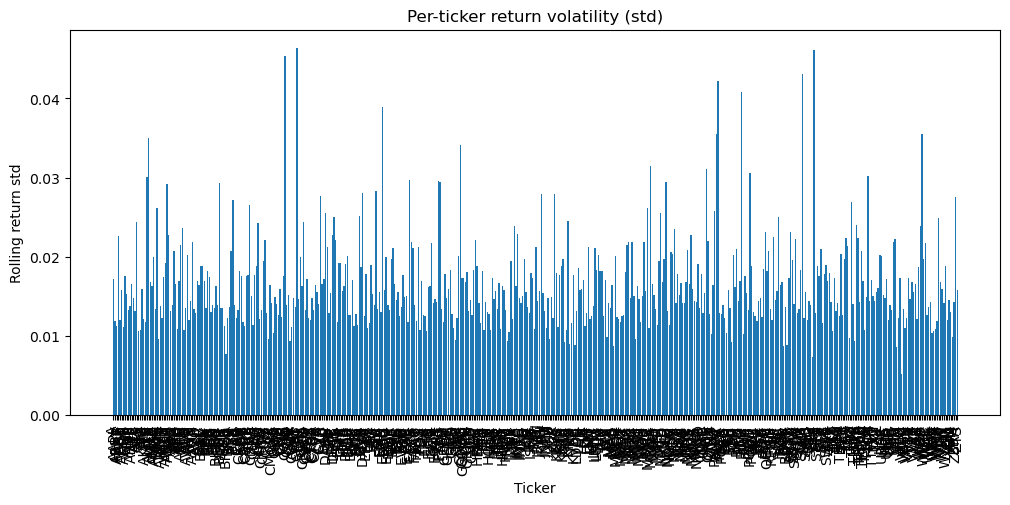

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.bar(summary['ticker'], summary['return_1d_std'])
plt.title('Per-ticker return volatility (std)')
plt.xlabel('Ticker')
plt.ylabel('Rolling return std')
plt.xticks(rotation=90)
plt.show()

In [6]:

#ohlcv_df['date'] = pd.to_datetime(ohlcv_df['date'])
ohlcv_df = _ohlcv.copy()
# Walkforward parameters
start_date = pd.to_datetime('2023-05-01')
end_date = ohlcv_df['date'].max()
freq = '6MS'   # Month Start, use 'W' for weekly, etc
window_length = 60
#tickers = ohlcv_df['ticker'].unique()

walkforward_dates = pd.date_range(start=start_date + pd.Timedelta(days=window_length), end=end_date, freq=freq)

walkforward_dates

DatetimeIndex(['2023-07-01', '2024-01-01', '2024-07-01', '2025-01-01'], dtype='datetime64[ns]', freq='6MS')

In [7]:
prev_date = "2023-01-01"
tickers = ohlcv_df['symbol'].unique()

for cutoff in tqdm(walkforward_dates):
    df = ohlcv_df.copy()
    cutoff_str = cutoff.strftime('%Y-%m-%d')
    
    print(f"\n=== Universe study up to {cutoff_str} ===")
    _ = generate_universe_easiness_report(
        ohlcv_df=df,
        tickers=tickers,
        window_length=window_length,
        target="return_1d",
        benchmark_col="market_return_1d",
        visualize=False,   # Skip plotting for speed, or True for debug
        cutoff_end_date=cutoff_str,
        cutoff_start_date=prev_date,
        save_csv_path="data/experiments/predictability_metrics-{hash}-{start}-{cutoff}.csv".format(hash="{hash}", cutoff=cutoff_str,start=prev_date)
    )
    prev_date = cutoff_str

  0%|          | 0/4 [00:00<?, ?it/s]


=== Universe study up to 2023-07-01 ===



 31%|███       | 155/504 [04:40<09:14,  1.59s/it]


 53%|█████▎    | 269/504 [07:39<07:04,  1.80s/it]C:\Users\Francisco Sá\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)

 61%|██████    | 307/504 [08:37<05:10,  1.57s/it]


 92%|█████████▏| 462/504 [14:00<01:38,  2.36s/it]


 25%|██▌       | 1/4 [16:04<48:12, 964.14s/it]

Saved all metrics to data/experiments/predictability_metrics-192114cdee4c5e5f137623aeec90f70fbf17c1a85a1fe7373e5e0e4655899033-2023-01-01-2023-07-01.csv (config hash: 192114cdee4c5e5f137623aeec90f70fbf17c1a85a1fe7373e5e0e4655899033)

=== Universe study up to 2024-01-01 ===



 31%|███       | 155/504 [07:40<16:02,  2.76s/it]


 62%|██████▏   | 310/504 [14:41<07:51,  2.43s/it]


 92%|█████████▏| 465/504 [20:16<01:22,  2.13s/it]


 50%|█████     | 2/4 [38:31<39:39, 1189.69s/it]

Saved all metrics to data/experiments/predictability_metrics-8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b216b96d6df748ed8e49e-2023-07-01-2024-01-01.csv (config hash: 8b990f761a6e476d5fcb8f9b7e235ac9b3ea89b5798b216b96d6df748ed8e49e)

=== Universe study up to 2024-07-01 ===



 31%|███       | 155/504 [09:43<20:08,  3.46s/it]


 62%|██████▏   | 310/504 [18:06<09:06,  2.82s/it]


 92%|█████████▏| 465/504 [25:32<01:46,  2.74s/it]


 75%|███████▌  | 3/4 [1:06:15<23:26, 1406.09s/it]

Saved all metrics to data/experiments/predictability_metrics-9c37f7afd47764eca915b29ca060ad8126a41bbca74bbc62bf6ecd6a0d1f178e-2024-01-01-2024-07-01.csv (config hash: 9c37f7afd47764eca915b29ca060ad8126a41bbca74bbc62bf6ecd6a0d1f178e)

=== Universe study up to 2025-01-01 ===



 31%|███       | 155/504 [09:42<22:01,  3.79s/it]


 61%|██████▏   | 309/504 [18:48<09:35,  2.95s/it]


 92%|█████████▏| 463/504 [26:49<02:23,  3.49s/it]


100%|██████████| 4/4 [1:35:51<00:00, 1437.77s/it]

Saved all metrics to data/experiments/predictability_metrics-ba3269ab135146d1f20ee0055b3e350214a1d529d9f0031f0658f118bc91c6f5-2024-07-01-2025-01-01.csv (config hash: ba3269ab135146d1f20ee0055b3e350214a1d529d9f0031f0658f118bc91c6f5)


# Futures and nice to haves

In [8]:
import os
import pandas as pd
import json

EXPERIMENTS_DIR = "data/experiments"

# List all experiment result CSVs
all_files = [f for f in os.listdir(EXPERIMENTS_DIR) if f.startswith('predictability_metrics-') and f.endswith('.csv')]

studies = []
for fname in all_files:
    df = pd.read_csv(os.path.join(EXPERIMENTS_DIR, fname))
    # Parse config from first row (all rows have same config)
    config = json.loads(df['config_json'].iloc[0])
    studies.append({'df': df, 'config': config, 'hash': df['config_hash'].iloc[0], 'filename': fname})


In [9]:
for study in studies:
    print(f"--- Study Hash: {study['hash']} | File: {study['filename']}")
    print(json.dumps(study['config'], indent=2))
    df = study['df']
    metrics = [col for col in df.columns if col not in ["ticker", "date", "config_hash", "config_json", "symbol"]]
    for metric in metrics:
        print(f"Metric: {metric}")
        print(f"  Mean: {df[metric].mean():.4f}, Std: {df[metric].std():.4f}")
        # Top and bottom tickers (by mean)
        agg = df.groupby('ticker')[metric].mean().sort_values(ascending=False)
        print("    Top 3 tickers:", agg.head(3).to_dict())
        print("    Bottom 3 tickers:", agg.tail(3).to_dict())
    print()

--- Study Hash: 09586cac4232b3e78c0b6897b5c9b229fe42ae9080909f639ebc5b5093fa8ffa | File: predictability_metrics-09586cac4232b3e78c0b6897b5c9b229fe42ae9080909f639ebc5b5093fa8ffa-2024-07-01-2025-01-01.csv
{
  "benchmark_col": "market_return_1d",
  "cutoff_end_date": "2025-01-01",
  "cutoff_start_date": "2024-07-01",
  "metrics": [
    "rolling_sharpe",
    "rolling_r2",
    "rolling_info_ratio",
    "rolling_autocorr",
    "rolling_sortino",
    "rolling_max_drawdown",
    "rolling_calmar",
    "rolling_hurst",
    "rolling_apen",
    "rolling_variance_ratio",
    "rolling_hmm_loglik",
    "rolling_volatility_regimes",
    "rolling_avg_dollar_volume",
    "rolling_spread_proxy"
  ],
  "target": "return_1d",
  "tickers": [
    "AAPL"
  ],
  "window_length": 60
}
Metric: return_1d
  Mean: 0.0014, Std: 0.0130
    Top 3 tickers: {'AAPL': 0.0014373559296440024}
    Bottom 3 tickers: {'AAPL': 0.0014373559296440024}
Metric: sharpe
  Mean: 0.1679, Std: 0.0753
    Top 3 tickers: {'AAPL': 0.167877

    Top 3 tickers: {'COIN': 0.008050865693453967, 'CRWD': 0.004690555560217401, 'WSM': 0.00409454485285945}
    Bottom 3 tickers: {'ALB': -0.0029950631626480544, 'CPRT': -0.0033319308118394436, 'SRE': -0.0036929349641060586}
Metric: sharpe
  Mean: 0.0206, Std: 0.1344
    Top 3 tickers: {'MPC': 0.22235972528761355, 'NOW': 0.2188146018684878, 'V': 0.2185771360067432}
    Bottom 3 tickers: {'NEE': -0.20978655398542856, 'HSY': -0.21921177229436548, 'CAG': -0.25260232078475836}
Metric: r2
  Mean: 0.0197, Std: 0.0243
    Top 3 tickers: {'DAL': 0.05866666031516597, 'BA': 0.05719133015164928, 'CCL': 0.048067393762000865}
    Bottom 3 tickers: {'CEG': 0.00580734313611717, 'WELL': 0.005673064100992478, 'MOH': 0.005360736109686464}
Metric: info_ratio
  Mean: -0.0221, Std: 0.1293
    Top 3 tickers: {'PSX': 0.20231131079631848, 'CRWD': 0.18218505041757993, 'PANW': 0.16066494612120052}
    Bottom 3 tickers: {'GLW': -0.23493776027800364, 'GIS': -0.25380843892615257, 'HSY': -0.3139038339528338}
Metric

    Top 3 tickers: {'PCAR': 0.6080574164012436, 'LULU': 0.5905139198766389, 'IFF': 0.5889388944979457}
    Bottom 3 tickers: {'HII': 0.28732696942828867, 'NXPI': 0.2741974567811634, 'KVUE': nan}
Metric: variance_ratio
  Mean: 0.9661, Std: 0.1230
    Top 3 tickers: {'UAL': 1.2116941698604906, 'PLTR': 1.2025379229459598, 'JBL': 1.1761797711084787}
    Bottom 3 tickers: {'BRO': 0.7725389668034476, 'AJG': 0.7685787787144721, 'KVUE': nan}
Metric: hmm_loglik
  Mean: 154.7230, Std: 15.7979
    Top 3 tickers: {'PEP': 184.97241714244814, 'KO': 184.8348782129719, 'MCD': 182.05452743491497}
    Bottom 3 tickers: {'SMCI': 105.7645078459705, 'COIN': 79.94351148145839, 'KVUE': nan}
Metric: volatility_regimes
  Mean: 0.2158, Std: 0.4114
    Top 3 tickers: {'HAS': 0.9838709677419355, 'BXP': 0.8870967741935484, 'JKHY': 0.8790322580645161}
    Bottom 3 tickers: {'ICE': 0.0, 'IPG': 0.0, 'FANG': 0.0}
Metric: avg_dollar_volume
  Mean: 514950596.5839, Std: 2034475573.2348
    Top 3 tickers: {'SPY': 32882011

  Mean: 0.3953, Std: 0.1460
    Top 3 tickers: {'BIIB': 0.3953124448355866}
    Bottom 3 tickers: {'BIIB': 0.3953124448355866}
Metric: variance_ratio
  Mean: 0.9721, Std: 0.1336
    Top 3 tickers: {'BIIB': 0.9720570973263701}
    Bottom 3 tickers: {'BIIB': 0.9720570973263701}
Metric: hmm_loglik
  Mean: 157.8827, Std: 10.4720
    Top 3 tickers: {'BIIB': 157.88268275763164}
    Bottom 3 tickers: {'BIIB': 157.88268275763164}
Metric: volatility_regimes
  Mean: 0.4457, Std: 0.4973
    Top 3 tickers: {'BIIB': 0.4457409568261377}
    Bottom 3 tickers: {'BIIB': 0.4457409568261377}
Metric: avg_dollar_volume
  Mean: 282975658.7957, Std: 69695071.0772
    Top 3 tickers: {'BIIB': 282975658.7956984}
    Bottom 3 tickers: {'BIIB': 282975658.7956984}
Metric: spread_proxy
  Mean: nan, Std: nan
    Top 3 tickers: {'BIIB': nan}
    Bottom 3 tickers: {'BIIB': nan}

--- Study Hash: ba3269ab135146d1f20ee0055b3e350214a1d529d9f0031f0658f118bc91c6f5 | File: predictability_metrics-ba3269ab135146d1f20ee0055b3e3

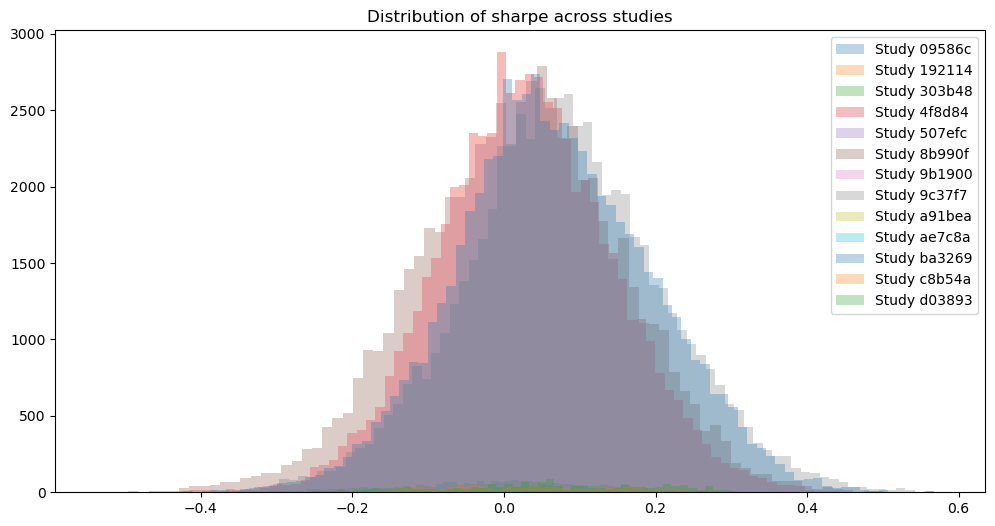

In [10]:
import matplotlib.pyplot as plt

def plot_metric_across_studies(metric_name):
    plt.figure(figsize=(12,6))
    for study in studies:
        df = study['df']
        if metric_name not in df.columns:
            continue
        plt.hist(df[metric_name], bins=80, alpha=0.3, label=f"Study {study['hash'][:6]}")
    plt.legend()
    plt.title(f"Distribution of {metric_name} across studies")
    plt.show()

# Example: Compare sharpe distributions
plot_metric_across_studies("sharpe")